<h1>O4 - Brennweite und Hauptebenen eines Linsensystems</h1>
<p>Simon Legtenborg, Leonie Parsiegel</p>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

<h2>Aufgabe 1</h2>
<p>Bestimmen Sie die Brennweite und die Lage der Hauptebenen eines Linsensystems, bestehend aus
zwei dünnen Sammellinsen, für einen vorgegebenen Linsenabstand.</p>

Mithilfe
$\begin{align}
\gamma = \frac{B}{G}= \frac{b}{g}\\
\frac{1}{f} = \frac{1}{g}+\frac{1}{b}
\end{align}$
ergeben sich folgende Gleichungen:
$\begin{align}
g = f \cdot (1+ \frac{1}{\gamma}) \\
b = f \cdot (1+ \gamma)
\end{align}$

Da wir g und b nur mithilfe einer zusätzlichen Konsante beschreiben können gilt:
$\begin{align}
g' = g+h = f \cdot (1+ \frac{1}{\gamma}) + h \\
b' = b+h' = f \cdot (1+ \gamma) + h'
\end{align}$

Leiten wir die Größen nach $\gamma$ bzw. $\frac{1}{g}$ ab, so erhalten wir:
$\begin{align}
\frac{\partial g'}{\partial \frac{1}{\gamma}} = f \\
\frac{\partial b'}{\partial \gamma} = f \\
\end{align}$


In [14]:
data = pd.read_csv("data.csv", sep=",",decimal=".")

A_G = data["A_G"].to_numpy()
A_l = data["A_l"].to_numpy()
A_B = data["A_B"].to_numpy()
G = data["G"].to_numpy()
B = data["B"].to_numpy()

d_G = 40
d_B = 30
d_l = 235

g_dash = A_l-A_G-d_G
b_dash = A_B - A_l + d_B
gamma = B/G

print(data)

   A_G  A_l     A_B  G     B
0   50  270   652.5  1  3.60
1   50  290   487.0  1  2.75
2   50  280   562.0  1  2.96
3   50  260   795.0  1  4.18
4   50  250   985.0  1  5.05
5   50  255   887.0  1  4.70
6   50  265   718.0  1  3.89
7   50  275   598.0  1  3.28
8   50  285   517.0  1  2.90
9   50  245  1134.0  1  5.86


In [15]:
def linear(x,m,n):
    return m*x+n

p1, cov = curve_fit(linear, 1/gamma, g_dash)
p2, cov = curve_fit(linear, gamma, b_dash)

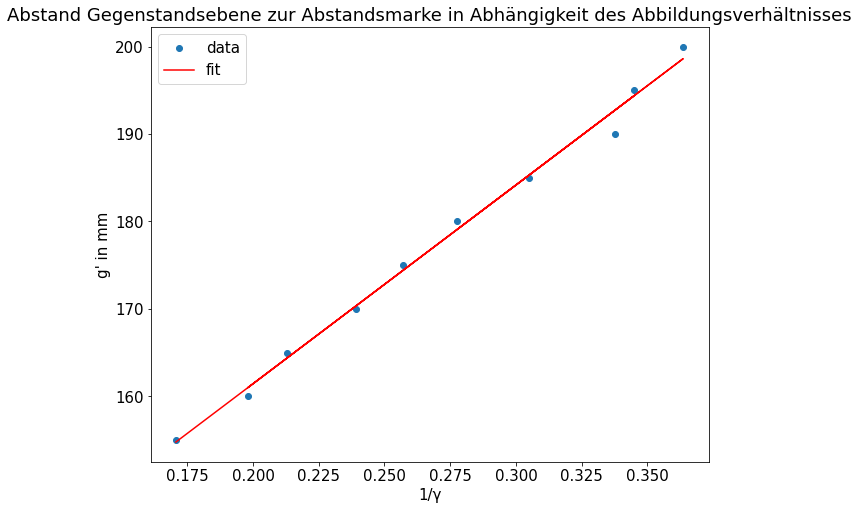

In [16]:
plt.scatter(1/gamma, g_dash, label="data")
plt.plot(1/gamma, linear(1/gamma, p1[0], p1[1]), color="red", label = "fit")
plt.xlabel("1/γ")
plt.ylabel("g' in mm")
plt.title("Abstand Gegenstandsebene zur Abstandsmarke in Abhängigkeit des Abbildungsverhältnisses")
plt.legend()

plt.show()

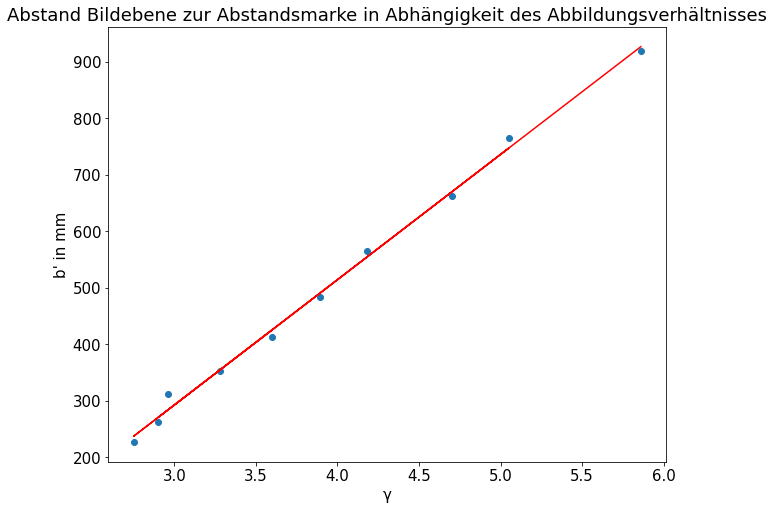

In [17]:
plt.scatter(gamma, b_dash)
plt.plot(gamma, linear(gamma, p2[0], p2[1]), color="red")
plt.xlabel("γ")
plt.ylabel("b' in mm")
plt.title("Abstand Bildebene zur Abstandsmarke in Abhängigkeit des Abbildungsverhältnisses")
plt.show()

In [18]:
f = (p1[0]+p2[0])/2
print(f"f = {np.round(f,2)}+-10 mm")
print(p1[0])
print(p2[0])

f = 224.55+-10 mm
227.27419789827493
221.82478208632818


Da wir nun die Frequenz ermittelt haben, können wir auch die Hauptachsen bestimmen:
Aus den obigen Gleichungen folgt:
$\begin{align}
h = g'- f \cdot (1+ \frac{1}{\gamma})\\
h' = b' - f \cdot (1+ \gamma)
\end{align}$


In [19]:
h = g_dash - f *(1+1/gamma)
h = np.average(h)

h_dash = b_dash - f * (1+gamma)
h_dash = np.average(h_dash)

print(f"h = {np.round(h, 2)}mm")
print(f"h' = {np.round(h_dash, 2)}mm")

h = -107.83mm
h' = -608.06mm


<h2>Aufgabe 2</h2>
<p>Messen Sie die Brennweiten der Linsen mit dem Besselverfahren. Berechnen Sie aus den
Brennweiten der Sammellinsen die Brennweite des Linsensystems.</p>

Mit:
$$\dfrac{1}{f} = \dfrac{1}{b} + \dfrac{1}{g}\\
s = g + d\\
e = b - g
$$
folgt:
$$
b = \dfrac{s + e}{2} \\
g = \dfrac{s - e}{2}
$$
und damit:
$$f = \dfrac{1}{4} * \left( s- \dfrac{e^2}{s} \right)$$


Für die erste Linse (IV1) geht:

In [20]:
a1_G = 50
a1_L1 = 162
a1_L2 = 1221
a1_B = 1300

s1 = a1_B-a1_G-d_G
e1 = a1_L2-a1_L1

In [21]:
f1 = 1/4 * (s1-e1**2/s1)
df1 = np.sqrt((e1 / (2 * s1) *2) ** 2 + ((e1 ** 2 / s1 ** 2 + 1) *2/ 4) ** 2)
print(f"f1 = {np.round(f1,2)}+-{np.round(df1,2)}mm")

f1 = 70.79+-1.24mm


Für die zweite Linse (IV2) geht:

In [22]:
a2_G = 50
a2_L1 = 404
a2_L2 = 985
a2_B = 1400

s2 = a2_B-a2_G-d_G
e2 = a2_L2-a2_L1

In [23]:
f2 = 1/4 * (s2-e2**2/s2)
df2 = np.sqrt((e1 / (2 * s1) *2) ** 2 + ((e1 ** 2 / s1 ** 2 + 1) *2/ 4) ** 2)
print(f"f2 = {np.round(f2,2)}+-{np.round(df2,2)}mm")

f2 = 263.08+-1.24mm


Damit gilt für die Brennweite des Linsensystems:
$\dfrac{1}{f} = \dfrac{1}{f_1} + \dfrac{1}{f_2} - \dfrac{d_l}{f_1 * f_2}$
Der Fehler kann folgendermaßen abgeschätzt werden:
$\Delta f=\sqrt{\left( \dfrac{e}{2*s} * \Delta e \right)^2+\left( \dfrac{ \dfrac{e^2}{s^2}+1}{4} * \Delta s \right)^2}$

In [24]:
f_inv = 1/f1+1/f2-d_l/(f1*f2)
f_calc = 1/f_inv
dd = 0.1
df = np.sqrt((((d_l - f2) * f2) / (f1 - d_l + f2) ** 2 * df1) ** 2 + (((d_l - f1) * f1) / (f2 - d_l + f1) ** 2 * df2) + (f1 * f2 / (d_l - f1 - f2) * dd) ** 2)
print(f"f = {np.round(f_calc,2)}+-{np.round(df,2)}mm")

f = 188.36+-18.9mm
